# **9. Transformada Cuántica de Fourier (QFT)**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

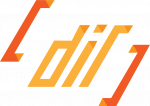

La **Transformada Cuántica de Fourier (QFT, por sus siglas en inglés)** es la versión cuántica de la transformada discreta de Fourier (DFT) que se usa en procesamiento de señales. Es una operación fundamental en **computación cuántica** porque convierte un estado cuántico que codifica información en el dominio del tiempo, en otro estado cuántico que codifica información en el dominio de la frecuencia.

Se utiliza en varios algoritmos cuánticos famosos, como:

*   El **algoritmo de Shor** para la factorización de números enteros.
*   El **algoritmo de estimación de fase**, que es clave para calcular valores propios en sistemas cuánticos.

🚀 ¿Qué actividad realizaremos?

1. **Crearemos un estado inicial binario o decimal.**

2. Aplicaremos la **QFT** a ese estado, lo que codifica información de fase.

3. **Invertiremos** los qubits porque la QFT devuelve resultados invertidos.

4. Aplicaremos la **inversa de la QFT (IQFT)** para recuperar el estado original.

5. Visualizaremos resultados en la **esfera de Bloch** y en **histogramas**.

## **QFT**

$$\vert x\rangle ⟶\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi ixk/N}\vert k\rangle$$

## **IQFT**

$$\vert x\rangle ⟶\frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{-2\pi ixk/N}\vert k\rangle$$

# **1. Instalar paqueterias**

Primero importas las bibliotecas necesarias:

In [ ]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.9 MB/s eta 0:00:00


# **2. Importación de bibliotecas**

Primero importas las bibliotecas necesarias:

In [ ]:
import numpy as np
from math import sqrt, pi, log2, ceil


from qiskit import QuantumCircuit # Construir circuitos
from qiskit import transpile #Para compilar el circuito

from qiskit.quantum_info import Operator, Statevector

from qiskit_aer import Aer # Simulador


# Visualizar los resultados
from qiskit.visualization import plot_histogram  #histograma
from qiskit.visualization import plot_bloch_multivector #en la esfera de bloch
from qiskit.visualization import array_to_latex

# **3. Implementar para $n$ qubits**

---



Si $N=2^{n}$

- Para $n=1$ qubit

$$U_{QFT}=\frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}\sum_{K=0}^{N-1}e^{2\pi i\frac{xy}{N}}\vert k\rangle\langle j\vert$$

$$ 	|X\rangle = \sum_{j=0}^{N-1}x_j|j\rangle \Longrightarrow |Y\rangle = \sum_{j=0}^{N-1}y_k|k\rangle  $$

Para el estado  inicial
$|\psi\rangle = \alpha|0\rangle +\beta |1\rangle$

\begin{equation}
\begin{split}
U_{QFT}|\psi\rangle & =\frac{1}{\sqrt{2}}\sum_{k=0}^{1}y_{k}\vert k\rangle\\
                    & =\frac{1}{\sqrt{2}}(y_{0}\vert 0\rangle +y_{1}\vert 1\rangle)
\end{split}
\end{equation}

donde

\begin{equation}
\begin{split}
|y_{0}\rangle & =\frac{1}{\sqrt{2}}\left(\alpha e^{2\pi i\frac{0*0}{2}}+\beta e^{2\pi i\frac{1*0}{2}}\right)\\
              & = \frac{1}{\sqrt{2}}\left(\alpha e^0 +\beta e^0\right)\\
              & = \frac{1}{\sqrt{2}}\left(\alpha +\beta\right)  
\end{split}
\end{equation}

y

\begin{equation}
\begin{split}
|y_{1}\rangle & =\frac{1}{\sqrt{2}}\left(\alpha e^{2\pi i\frac{0*1}{2}}+\beta e^{2\pi i\frac{1*1}{2}}\right)\\
              & = \frac{1}{\sqrt{2}}\left(\alpha e^0 +\beta e^{\pi i}\right)\\
              & = \frac{1}{\sqrt{2}}\left(\alpha -\beta\right)  
\end{split}
\end{equation}

Obtenemos al estado

\begin{equation}
\begin{split}
U_{QFT}|\psi\rangle & =\frac{1}{\sqrt{2}}(y_{0}\vert 0\rangle +y_{1}\vert 1\rangle)\\
                    & =\frac{1}{\sqrt{2}}[(\alpha +\beta)\vert 0\rangle +(\alpha -\beta)\vert 1\rangle]
\end{split}
\end{equation}



- Para $n=3$ qubits

Para el estado  inicial
$|x\rangle = |x_2x_1x_0\rangle = |011\rangle$

\begin{equation}
\begin{split}
U_{QFT}|x\rangle & =\frac{1}{\sqrt{N}}
		\left ( |0 \rangle + e^{2\pi i \frac{{\color{blue}x_{0}}}{{\color{purple}2}}}|1\rangle \right )
		\otimes \left( |0 \rangle + e^{2\pi i \left(\frac{{\color{blue}x_{0}}}{{\color{purple}2^2}}+\frac{{\color{blue}x_{1}}}{{\color{purple}2}}\right)}|1\rangle \right )
		\otimes
		\left( |0 \rangle + e^{2\pi i \left(\frac{{\color{blue}x_{0}}}{{\color{purple}2^3}}+\frac{{\color{blue}x_{1}}}{{\color{purple}2^2}}+\frac{{\color{blue}x_{2}}}{{\color{purple}2}}\right)}|1\rangle \right )\\
 & = \frac{1}{\sqrt{N}}
		\left ( |0 \rangle + e^{2\pi i \frac{{\color{blue}1}}{{\color{purple}2}}}|1\rangle \right )
		\otimes \left( |0 \rangle + e^{2\pi i \left(\frac{{\color{blue}1}}{{\color{purple}2^2}}+\frac{{\color{blue}1}}{{\color{purple}2}}\right)}|1\rangle \right )
		\otimes
		\left( |0 \rangle + e^{2\pi i \left(\frac{{\color{blue}1}}{{\color{purple}2^3}}+\frac{{\color{blue}1}}{{\color{purple}2^2}}+\frac{{\color{blue}0}}{{\color{purple}2}}\right)}|1\rangle \right )
\end{split}
\end{equation}

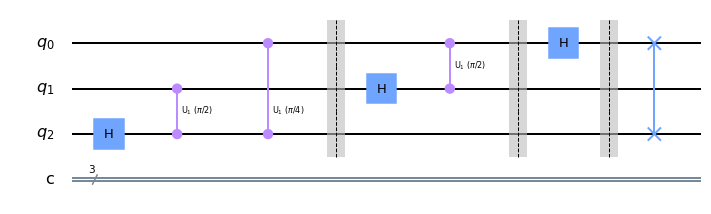

In [ ]:
bh = QuantumCircuit(2)
bh.h(0)
bh.cx(0,1)

Statevector(bh).draw('latex', max_size=16, prefix="\\vert\\text{bh}\\rangle = ")

<IPython.core.display.Latex object>

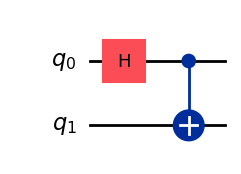

In [ ]:
bh.draw('mpl')

In [ ]:
bhs = QuantumCircuit(2)
bhs.h(0)
bhs.cx(0,1)
bhs.cx(0,1)
bhs.h(0)

Statevector(bhs).draw('latex', max_size=16, prefix="\\vert\\text{bhs}\\rangle = ")

<IPython.core.display.Latex object>

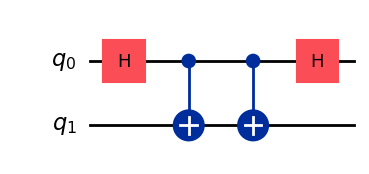

In [ ]:
bhs.draw('mpl')

$\textbf{3.1. Crear el circuito cuántico con el estado $\vert 011\rangle$}$

In [ ]:
# 1. En esta sección creas un circuito de 3 qubits:

numero_qubits = 3
s_QFT = QuantumCircuit(numero_qubits)

# Inicializando y agregando operaciones al circuito

# 2. Esta parte define el estado inicial:
s_QFT.x(0)
s_QFT.x(1)

# Por lo tanto, el estado inicial será ∣011⟩.

s_QFT.barrier() # La barrera simplemente separa las etapas del circuito visualmente.

# 3. Aquí empiezas a aplicar la QFT (Transformada Cuántica de Fourier) manualmente:
s_QFT.h(2)
s_QFT.cp(pi/2,1,2)
s_QFT.cp(pi/4,0,2)
s_QFT.barrier()

# Puerta Hadamard (H) en el qubit 2 (H∣0⟩): Lo coloca en superposición ∣+⟩.

# Puerta CP (Controlada-Phase) entre qubits 1 y 2 con ángulo π/2​. Esto añade una fase condicional.

# Puerta CP entre 0 y 2 con ángulo π/4​. Añade una fase más pequeña.

# Esto crea interferencia de fases, característica de la QFT.

# 4. Luego sigues con:
s_QFT.h(1)
s_QFT.cp(pi/2,0,1)
s_QFT.barrier()
s_QFT.h(0)


# Aplicas Hadamard en qubit 1.

# Aplicas una puerta controlada-phase entre 0 y 1.

# Aplicas Hadamard en qubit 0.

s_QFT.barrier()      # Creas una barrera para separar la operación

# 5. Finalmente aplicas SWAP(0,2) porque la QFT devuelve los resultados en orden inverso.
s_QFT.swap(0,2)

s_QFT.barrier()      # Creas otra barrera

# El estado cuántico en este punto ya está en la base de Fourier.

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

$$ SWAP =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}
$$\
$$ 	|a,b\rangle \Longrightarrow |b,a\rangle $$

$\textbf{3.2. Mostrar el circuito}$

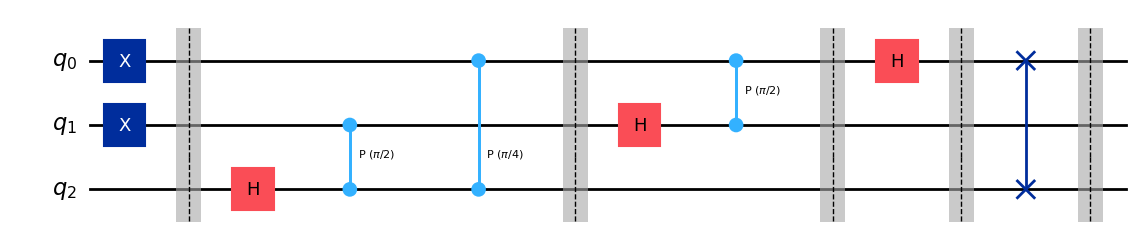

In [ ]:
# 6. Visualizar el circuito
s_QFT.draw('mpl')

$\textbf{3.3. Ejecutando circuito}$

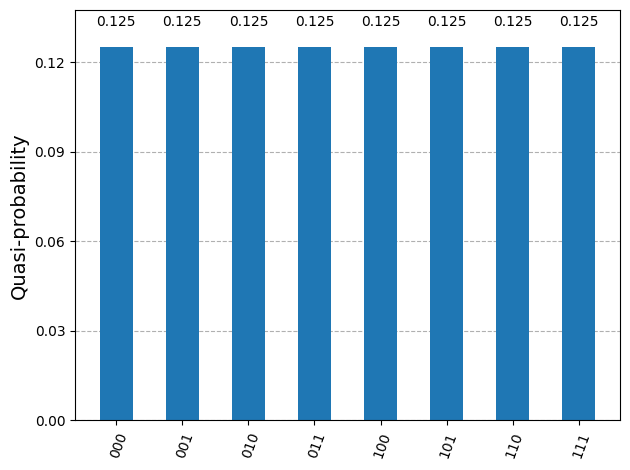

In [ ]:
backed = Aer.get_backend('statevector_simulator')
compilado = transpile(s_QFT, backed)
job = backed.run(compilado, shots=1024)
result = job.result().get_counts()
plot_histogram(result)

* Aquí seleccionas el simulador `statevector_simulator`, que calcula directamente el vector de estado del sistema cuántico en vez de realizar una simulación basada en mediciones (como lo haría `qasm_simulator`).

* `transpile()` traduce el circuito cuántico a una versión que se pueda ejecutar en el simulador específico (`statevector_simulator`). Esta compilación optimiza las compuertas y ajusta el circuito a las características del backend.

* `backend.run()` ejecuta el circuito. El parámetro `shots=1024` no es necesario en este simulador, ya que el vector de estado se calcula de forma determinista (pero no afecta el resultado).

El simulador está usando un espacio de dimensión $2×2×2=8$, es decir, trabaja con 3 qubits (ya que $2^3=8$).

Cada elemento del vector representa la amplitud de probabilidad del estado base $\vert 000⟩,\vert 001⟩,\vert 010⟩,…,\vert 111⟩$.

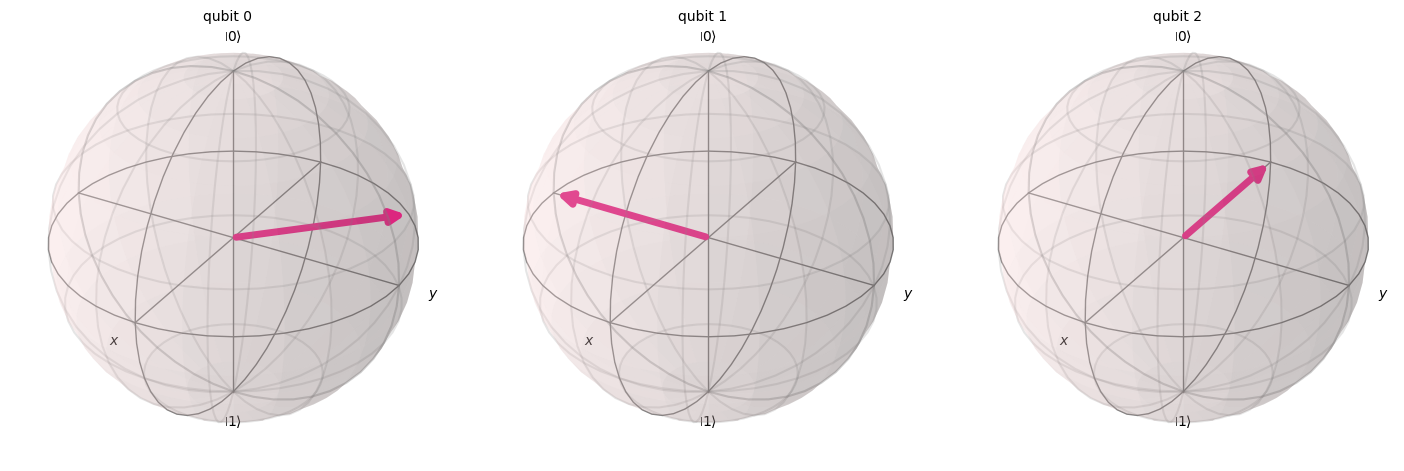

In [ ]:
backend2 = Aer.get_backend('aer_simulator')
qc_init = s_QFT.copy()
qc_init.save_statevector()
statevector = backend2.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

# **4. Definir la funciones para QFT.**

$\textbf{4.1. Definir la función para codificar el estado inicial.}$

In [ ]:
def entradaBin(bin_ent,qc):  # Función para cargar un número binario
    cont = 0
    for i in list(bin_ent):  # Toma un número binario (ej. '011') e invierte los qubits correspondientes.
        if i == '1':         # Si detecta un '1' aplica una puerta X en ese qubit.
            qc.x(cont)
        cont += 1            # Esta función es útil para cargar cualquier estado inicial en el circuito.

def entradaDec(dec_ent,qc):     # Función para cargar un número decimal
    cont = ceil(log2(dec_ent))
    for i in range(cont):       # Convierte un número decimal en una superposición cuántica.
        qc.h(i)                 # Aplica puertas Hadamard para crear la superposición.
        qc.p(dec_ent*pi/(pow(2,cont-1)),i)   # Aplica una puerta de fase (P) controlada para agregar fases condicionales.
        cont -= 1                            # Es útil para transformar números decimales a estados cuánticos.

$\textbf{4.2. Definir la función para transformada cuantica de fourier}$

Esta es la **función más importante**. Implementa la **QFT** completa para $n$ qubits:

In [ ]:
def QFT(circ,numeroQubits):
    for i in range(numeroQubits-1,-1,-1):  # Recorre todos los qubits desde el último hasta el primero.
        circ.h(i)                          # Aplica una Hadamard al qubit i.
        for j in range(i):
            circ.cp(np.pi/(2**(i-j)),j,i)  # Aplica puertas control-phase (CP) para agregar interferencias de fase.

Matemáticamente esto implementa:

$$\vert x\rangle\xrightarrow{\text{QFT}} \frac{1}{\sqrt{2^n}}\sum_{y=0}^{2^{n}-1}e^{2\pi i\frac{xy}{2^n}}\vert y\rangle$$

$\textbf{4.3. Definir función para cambiar valores por la posición de los qubits (util es qiskit por el estandar)}$

In [ ]:
def cambio(circ, numero_qubits):           # Función para invertir qubits (Swap)
    for i in range(int(numero_qubits/2)):
        circ.swap(i,numero_qubits-i-1)



**1.** La **QFT** devuelve el resultado al revés (Least Significant Bit a la izquierda).

**2.** Esta función usa **SWAP** para corregir el orden.



$\textbf{4.4. Definir la función para transformada inversa cuantica de fourier}$



In [ ]:
def IQFT(circ,numeroQubits):               # Función para la Inversa de la QFT (IQFT)
    for i in range(numeroQubits):
        for j in range(i):
            circ.cp(-np.pi/(2**(i-j)),j,i)   # Aplica puertas controladas de fase con fase negativa para deshacer la QFT.
        circ.h(i)                            # Aplica Hadamard en cada qubit.

***Nota: Esto devuelve el estado a la base computacional.***

# **5.  Pruebas del circuito**

* Primera prueba con $∣110⟩$

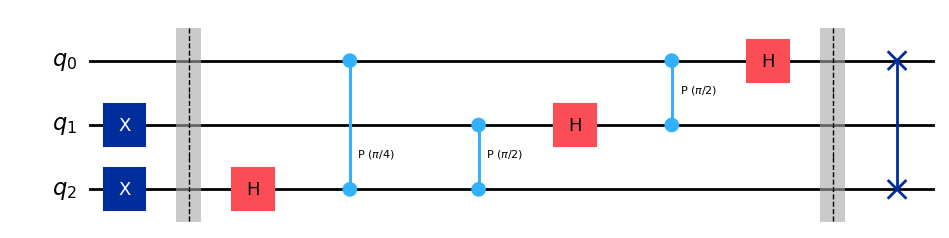

In [ ]:
datoInicial = '011'

circ = QuantumCircuit(len(datoInicial))

entradaBin(datoInicial,circ)

circ.barrier()

QFT(circ, len(datoInicial))

circ.barrier()

cambio(circ,len(datoInicial))

circ.draw('mpl')

In [ ]:
Statevector(circ).draw('latex', max_size=16)

<IPython.core.display.Latex object>

El estado queda en superposición cuántica con fases específicas.

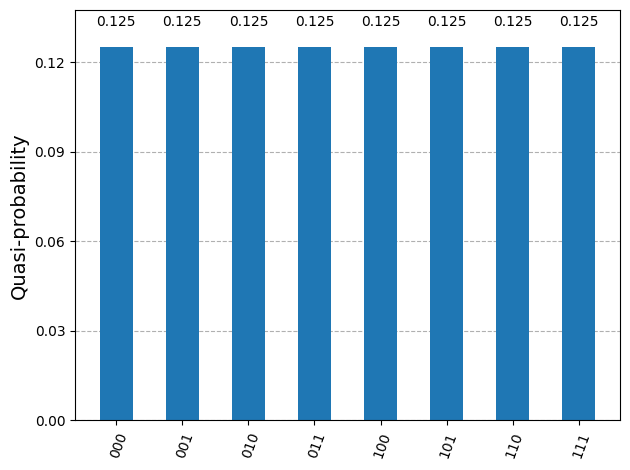

In [ ]:
backend = Aer.get_backend('statevector_simulator')
compilado = transpile(circ, backend)
job = backend.run(compilado, shots=1024)
result = job.result().get_counts()
plot_histogram(result)

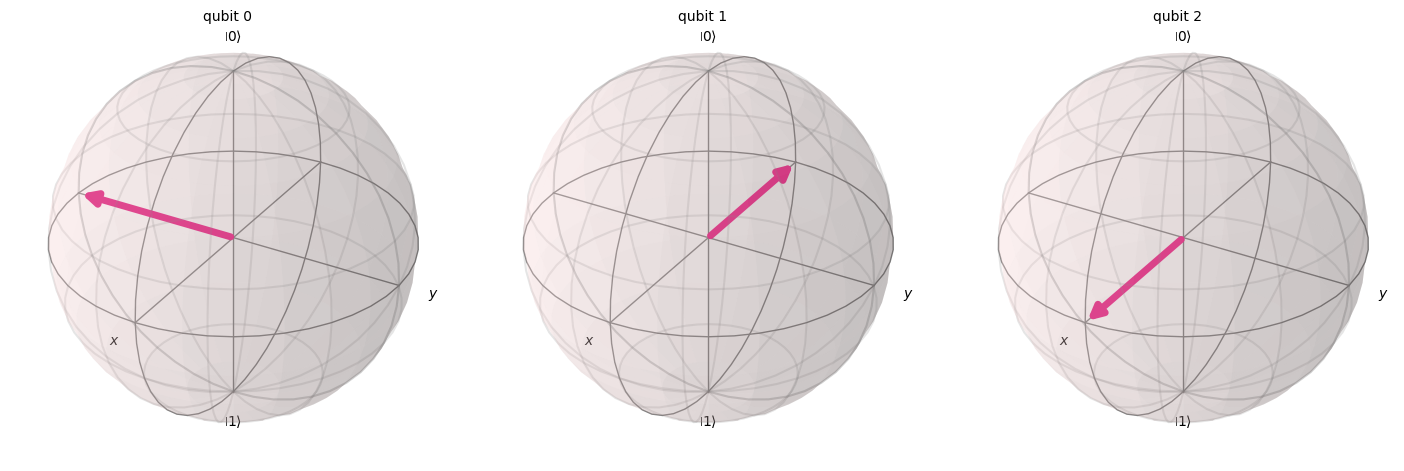

In [ ]:
backend2 = Aer.get_backend('aer_simulator')
qc_init = circ.copy()
qc_init.save_statevector()
statevector = backend2.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

* Segunda prueba con $∣001⟩$

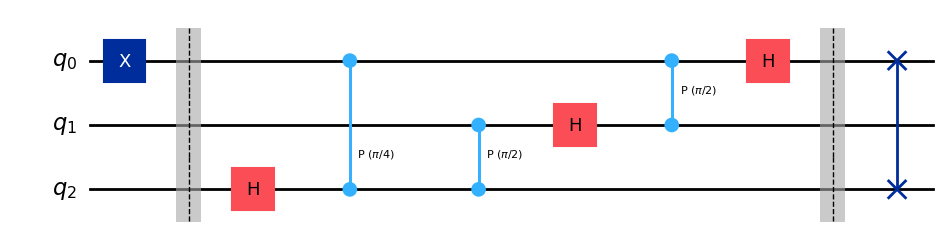

In [ ]:
datoInicial = '100'

circ = QuantumCircuit(len(datoInicial))

entradaBin(datoInicial,circ)

circ.barrier()

QFT(circ, len(datoInicial))          # Aplica la QFT al estado ∣001⟩.

circ.barrier()

cambio(circ,len(datoInicial))

circ.draw('mpl')

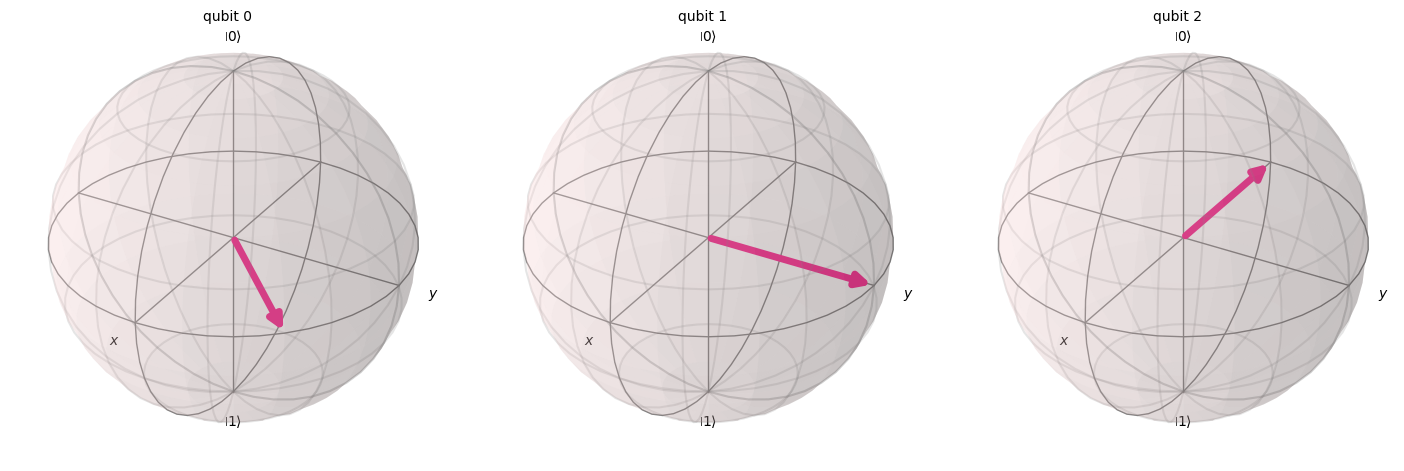

In [ ]:
backend2 = Aer.get_backend('aer_simulator')
qc_init = circ.copy()
qc_init.save_statevector()
statevector = backend2.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

# **6. Transformada inversa cuántica de Fourier (IQFT)**

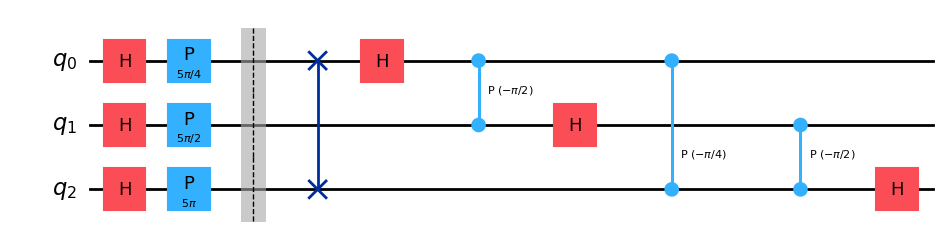

In [ ]:
#Crear circuito
datoInicial = 5

numero_qubits = ceil(log2(datoInicial))

circ = QuantumCircuit(numero_qubits)

entradaDec(datoInicial,circ)

circ.barrier()

cambio(circ,numero_qubits)

# Aplicar la inversa (IQFT)
IQFT(circ,numero_qubits)

circ.draw('mpl')

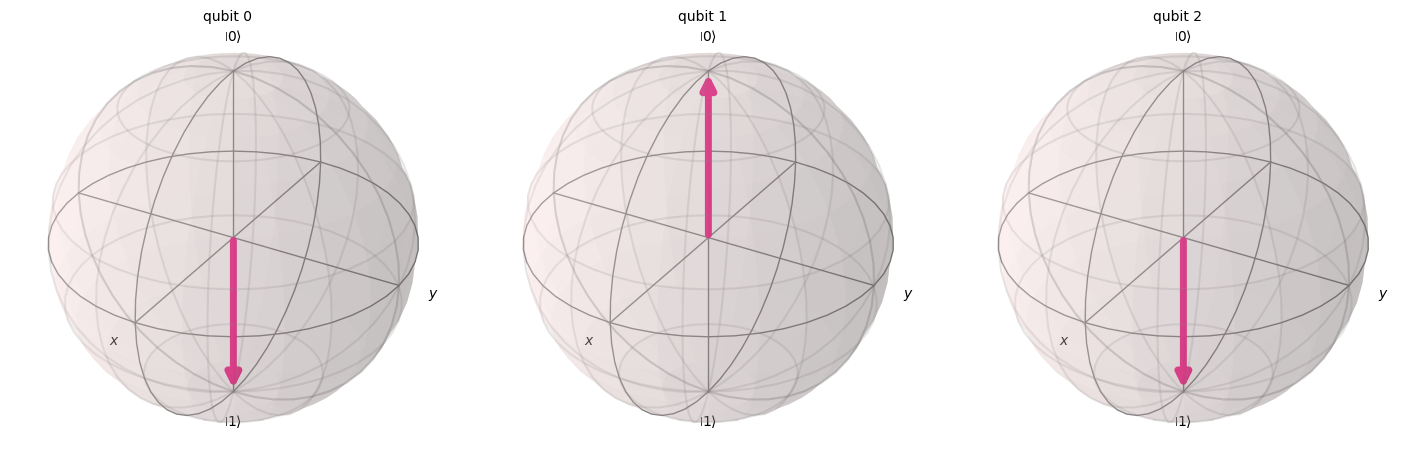

In [ ]:
qc_init = circ.copy()
qc_init.save_statevector()
sim = Aer.get_backend('aer_simulator')
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

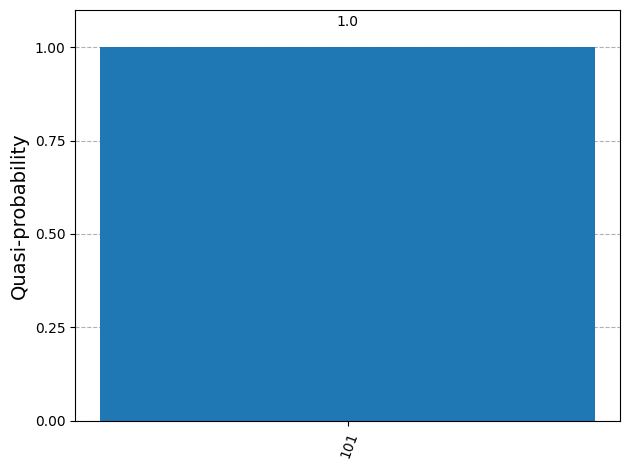

In [ ]:
#Analizando resultados
backend = Aer.get_backend('statevector_simulator')
compilado = transpile(circ, backend)
job = backend.run(compilado, shots=1024)
result = job.result().get_counts()
plot_histogram(result)

## **Ejercicio:**

Raliza la medición con el estado $∣100⟩$.

1. Dibuja el circuito.
2. Obten las esferas de Bloch.
3. Obten el histograma.

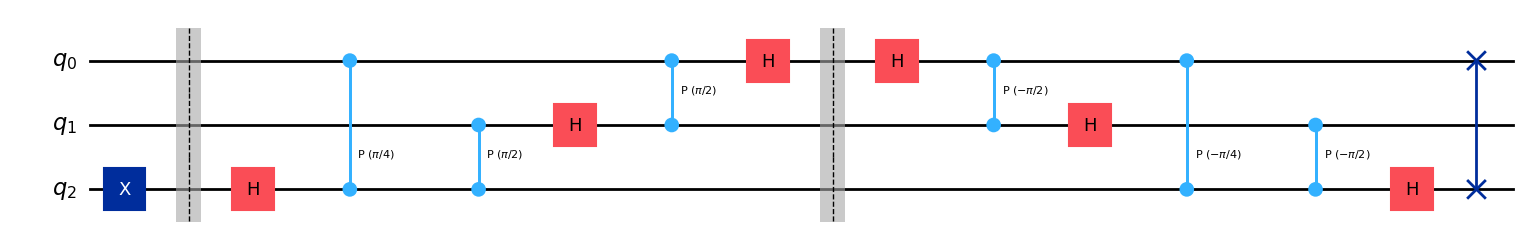

In [ ]:
datoInicial = '001'

circ = QuantumCircuit(len(datoInicial))

entradaBin(datoInicial,circ)

circ.barrier()

QFT(circ, len(datoInicial))

circ.barrier()

IQFT(circ,len(datoInicial))

cambio(circ,len(datoInicial))

circ.draw('mpl')

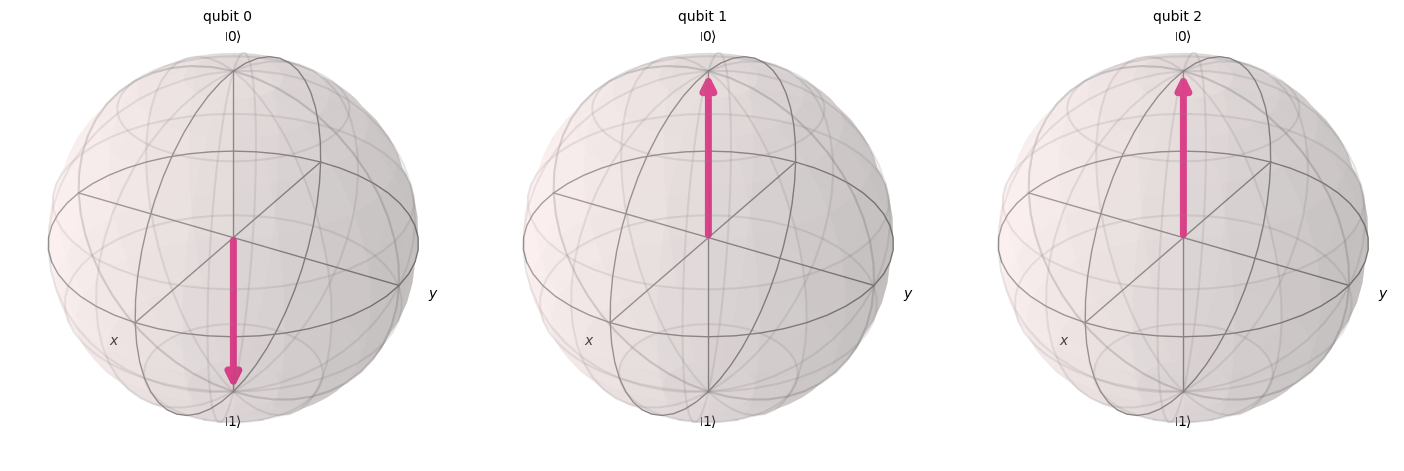

In [ ]:
backend2 = Aer.get_backend('aer_simulator')
qc_init = circ.copy()
qc_init.save_statevector()
statevector = backend2.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

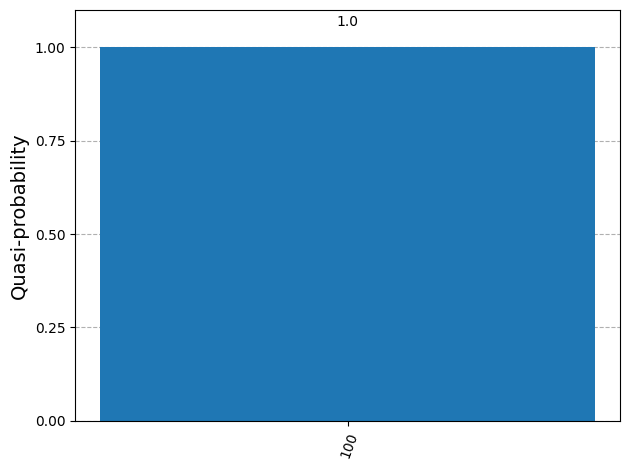

In [ ]:
backend2 = Aer.get_backend('statevector_simulator')
compilado = transpile(circ, backend)
job = backend.run(compilado, shots=1024)
result = job.result().get_counts()
plot_histogram(result)